In [100]:
%load_ext autoreload
%autoreload 2
from WhiteDwarf import WhiteDwarf
from plotter import plotter
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/caritsang/Library/CloudStorage/OneDrive-TheChineseUniversityofHongKong/01 Project/FYP_Sem1/WhiteDwarf.py:103: RuntimeWarning: invalid value encountered in scalar divide
  nm_drhodr = nm_TOV / self.nm.gamma(nm_rho)


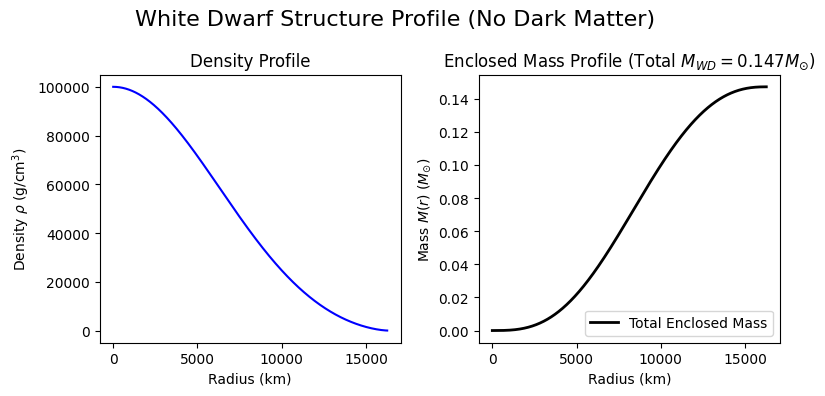

In [121]:
wd_nodm = WhiteDwarf(
                 nm_rhoc=1e5, # core density of normal matter [g/cc]
                 Ye=0.5, # electron fraction
                 )
wd_nodm.integrate()
wd_profiles = plotter(wd_nodm)
wd_profiles.plot_profiles()

/Users/caritsang/Library/CloudStorage/OneDrive-TheChineseUniversityofHongKong/01 Project/FYP_Sem1/WhiteDwarf.py:103: RuntimeWarning: invalid value encountered in scalar divide
  nm_drhodr = nm_TOV / self.nm.gamma(nm_rho)


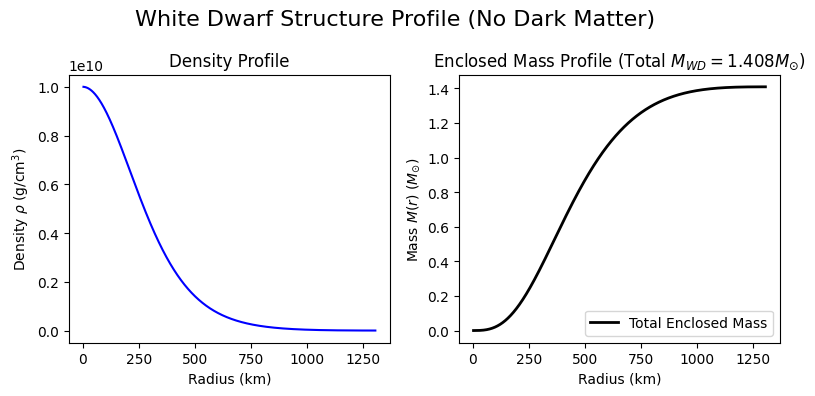

In [190]:
wd_nodm = WhiteDwarf(
                 nm_rhoc=1e10, # core density of normal matter [g/cc]
                 Ye=0.5, # electron fraction
                 )
wd_nodm.integrate()
wd_profiles = plotter(wd_nodm)
wd_profiles.plot_profiles()

In [95]:
wd_nodm.mbar2m(wd_nodm.history[-1])

array([2.42229677e-01, 1.05700425e-03, 1.40848457e+00])

4.021961184882533e+18
4.0279941266598564e+18
4.027999816686039e+18
4.0340384481630884e+18
4.034038449047248e+18
4.040088817200988e+18
4.0400945229494467e+18
4.046150596522741e+18
4.0461505974094787e+18
4.052218440844855e+18
4.0522241623552026e+18
4.0582977269695616e+18
4.058297727858883e+18
4.064383095609316e+18
4.064388832921239e+18
4.070479937649752e+18
4.0704799385416653e+18
4.0765828797690496e+18
4.0765886329223107e+18
4.0826973269666186e+18
4.082697327861131e+18
4.088817891856116e+18
4.0888236608905503e+18
4.0949499935811195e+18
4.094949994478239e+18
4.101088230660505e+18
4.1010940156160225e+18
4.107238036412427e+18
4.10723803731216e+18
4.113393995230694e+18
4.1133997961472773e+18
4.11956155463847e+18
4.119561555540825e+18
4.1257352848742e+18
4.1257411017919073e+18
4.1319206476965023e+18
4.131920648601487e+18
4.138112199158137e+18
4.138118032117102e+18
4.144315415283648e+18
4.1443154161912704e+18
4.1505248379097733e+18
4.1505306869502003e+18
4.1567459573574656e+18
4.15674595826773

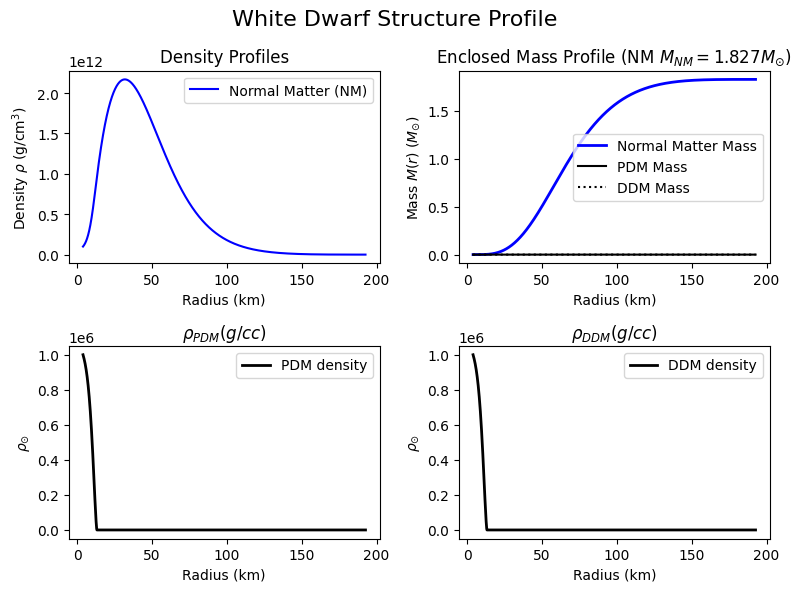

In [237]:
wd = WhiteDwarf(
                 nm_rhoc=1e11, # core density of normal matter [g/cc]
                 Ye=0.5, # electron fraction
                 pdm_rhoc=1e6, # core density of parent dark matter [g/cc]
                 ddm_rhoc=1e6, # core density of daughter dark matter [g/cc]
                 k=1e-7, # decay constant of parent dark matter [s-1]
                 Z=6, # atomic number of normal matter 
                 pdm_m=3, # mass of parent dark matter particle [GeV]
                 ddm_m=2.5 # mass of daughter dark matter particle [GeV]
                 )
wd.integrate(verbose=False)
wd_plt = plotter(wd)
wd_plt.plot_profiles()

100%|██████████| 10/10 [00:10<00:00,  1.00s/it]


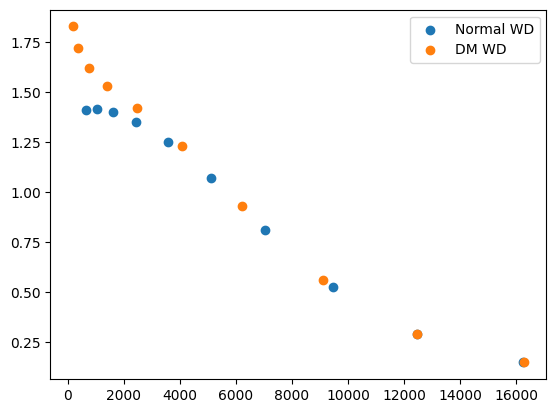

In [239]:
wd_nodm_M = []
wd_nodm_R = []
wd_dm_R = []
wd_dm_M = []

param = {"Ye":0.5, # electron fraction
        #"pdm_rhoc":1e5, # core density of parent dark matter [g/cc]
        #"ddm_rhoc":1e5, # core density of daughter dark matter [g/cc]
        "k":1e-7, # decay constant of parent dark matter [s-1]
        "Z":6, # atomic number of normal matter 
        "pdm_m":3, # mass of parent dark matter particle [GeV]
        "ddm_m":2.5 # mass of daughter dark matter particle [GeV]
        }

nm_density_range = np.logspace(5, 11, 10)
for nm_density in tqdm(nm_density_range):
    wd_dm = WhiteDwarf(nm_rhoc=nm_density, pdm_rhoc = nm_density/1e5, ddm_rhoc = nm_density/1e5, **param)
    wd_dm.integrate()
    wd_dm_M.append(wd_nodm.mbar2m(wd_dm.history[-1][4]))
    wd_dm_R.append(wd_nodm.rbar2r(wd_dm.history[-1][0]))
    
    wd_nodm = WhiteDwarf(
                 nm_rhoc=nm_density, # core density of normal matter [g/cc]
                 Ye=0.5, # electron fraction
                 )
    
    wd_nodm.integrate()
    wd_nodm_M.append(wd_nodm.mbar2m(wd_nodm.history[-1][2]))
    wd_nodm_R.append(wd_nodm.rbar2r(wd_nodm.history[-1][0]))

plt.scatter(wd_nodm_R, wd_nodm_M, label='Normal WD')
plt.scatter(wd_dm_R, wd_dm_M, label='DM WD')
plt.legend()

In [235]:
print(wd_dm.mbar2m(wd_dm.history[-1][-2] + wd_dm.history[-1][-1]))
print(wd_dm.mbar2m(wd_dm.history[-1][-3]))

4.328325280052365e-09
1.8265087161507991
